<a href="https://colab.research.google.com/github/Luckyali4/IPL-DATASET-ANALYSIS/blob/main/Netflix_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [10]:
#exploring genres column
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [11]:
df.duplicated().sum()

0

In [12]:
#eexporing sumarry statstics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [14]:
#castinf column a
df['Release_Date']=pd.to_datetime(df['Release_Date'])
#confirming chnages
print(df['Release_Date'].dtypes)

datetime64[ns]


In [16]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [18]:
cols=['Overview','Original_Language','Poster_url']


In [23]:
#droppinr columns and confirming changes
#Check if columns exist before dropping
cols_to_drop = [col for col in cols if col in df.columns]
df.drop(cols_to_drop, axis=1, inplace=True)
df.columns
df.columns


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Poster_Url'],
      dtype='object')

In [25]:
def catigorize_col (df,col, labels):
    edges[df[col].describe()['min'],
          df[col].describe()['25%'],
          df[col].describe()['50%'],
          df[col].describe()['75%'],
          df[col].describe()['max']]



In [30]:
import numpy as np
import pandas as pd

def catigorize_col(df, col, labels):
    # Define edges within the function
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    # Now you can use edges for further calculations or assignments within the function
    # For example, you might want to use pd.cut to categorize the column based on edges and labels
    df[col] = pd.cut(df[col], bins=edges, labels=labels, include_lowest=True, duplicates='drop')

# Example usage:
# definees labels for edges
labels=['not_popular','below_avg','average','popular']
#categorixe column based in lABELS and edges
catigorize_col(df,'Vote_Average',labels)
#confirming changes
print(df['Vote_Average'].unique())

['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [31]:
#exploring columns
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2567
popular,2450
average,2412
below_avg,2398


In [32]:
#dropping Nans
df.dropna(inplace=True)
#confirming
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Poster_Url,0


In [33]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,2618.087,122,below_avg,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [34]:
#split the strings into list
df['Genre']=df['Genre'].str.split(',')
#explode the lists
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,3827.658,1151,popular,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,3827.658,1151,popular,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [35]:
#casting column into category
df['Genre']=df['Genre'].astype('category')
#confirming chnages
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  category
 5   Genre         25793 non-null  category
 6   Poster_Url    25793 non-null  object  
dtypes: category(2), float64(1), int32(1), int64(1), object(2)
memory usage: 958.8+ KB


In [37]:
df.nunique()

,0
Release_Date,102
Title,9513
Popularity,8160
Vote_Count,3266
Vote_Average,4
Genre,38
Poster_Url,9827


In [38]:
df['Genre'].describe()

,Genre
count,25793
unique,38
top,Thriller
freq,1973


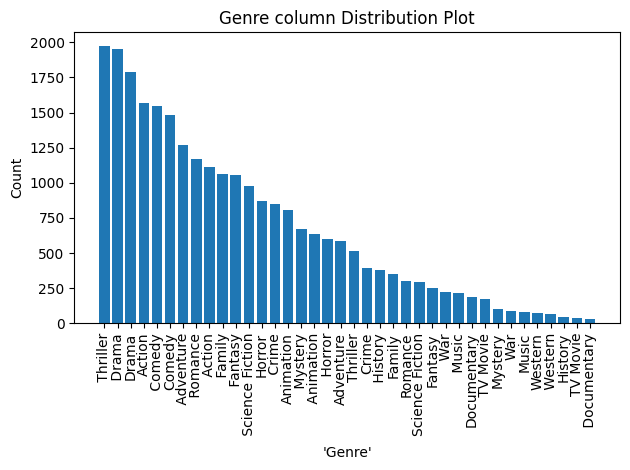

In [45]:
import matplotlib.pyplot as plt

# Get the genre counts
genre_counts = df['Genre'].value_counts()

# Create the bar plot using plt.bar
plt.bar(genre_counts.index, genre_counts.values)

plt.xlabel("'Genre'")
plt.ylabel("Count")
plt.title("Genre column Distribution Plot")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

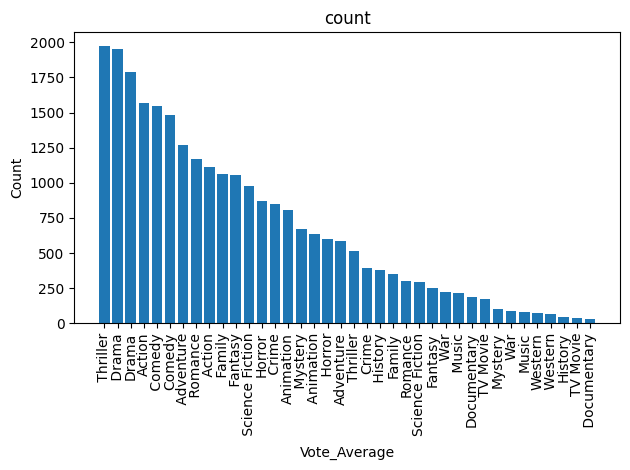

In [48]:
import matplotlib.pyplot as plt

# visulaizing vote_average column
genre_counts = df['Genre'].value_counts()

# Create the bar plot using plt.bar
plt.bar(genre_counts.index, genre_counts.values)

plt.xlabel("Vote_Average")
plt.ylabel("Count")
plt.title("count")
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [50]:
#finding movie got the highest popularity
#chevcking the max popularity
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...


In [51]:
##finding movie got the lowest popularity
#chevcking the min popularity
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Poster_Url
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25790,1984,Threads,13.354,186,popular,War,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
25791,1984,Threads,13.354,186,popular,Drama,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
25792,1984,Threads,13.354,186,popular,Science Fiction,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


Text(0, 0.5, 'Frequency')

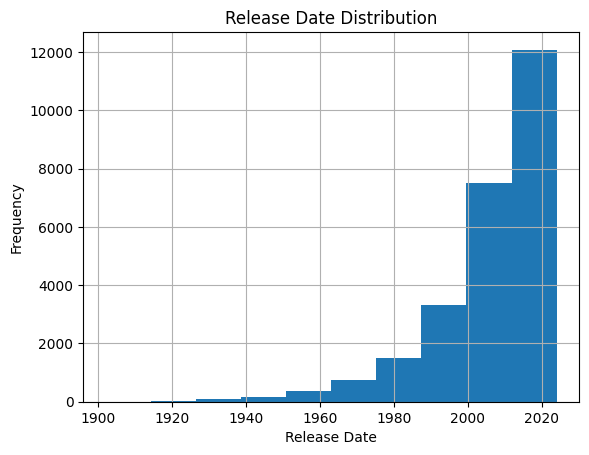

In [53]:
#which year has the most filmmed movies?
df['Release_Date'].hist()
plt.title("Release Date Distribution")
plt.xlabel("Release Date")
plt.ylabel("Frequency")